In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## MAEMS and MAEMD

In [2]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])
dat_source

,Time-Date stamp,Date,ERCOT Load,Total Wind Output,Total Wind Installed,"Wind Output, % of Load","Wind Output, % of Installed",1-hr MW change,1-hr % change
0,01-01-2020 00:00:00,Jan-01,36823,12335,27040,33.5,45.617,NaN,NaN
1,01-01-2020 01:00:00,Jan-01,36511,13300,27040,36.4,49.187,965.4,7.826
2,01-01-2020 02:00:00,Jan-01,36022,13586,27040,37.7,50.245,286.2,2.152
3,01-01-2020 03:00:00,Jan-01,35790,14107,27040,39.4,52.171,520.9,3.834
4,01-01-2020 04:00:00,Jan-01,35642,14887,27040,41.8,55.055,779.6,5.527
...,...,...,...,...,...,...,...,...,...
35060,12-31-2023 20:00:00,Dec-31,44887,17161,38631,38.23,44.42,2858,19.99
35061,12-31-2023 21:00:00,Dec-31,44013,18301,38631,41.58,47.37,1139,6.64
35062,12-31-2023 22:00:00,Dec-31,43280,18607,38631,42.99,48.17,307,1.67
35063,12-31-2023 23:00:00,Dec-31,42319,17866,38631,42.22,46.25,-741,-3.98


In [3]:
dat_source.loc[dat_source['Total Wind Installed']==max(dat_source['Total Wind Installed'])].iloc[0], dat_source.loc[dat_source['Total Wind Installed']==min(dat_source['Total Wind Installed'])].iloc[0], dat_source.loc[dat_source['Total Wind Output']==max(dat_source['Total Wind Output'])], dat_source.loc[dat_source['Wind Output, % of Installed']==max(dat_source['Wind Output, % of Installed'])]

(Time-Date stamp                12-20-2023 00:00:00
 Date                                        Dec-20
 ERCOT Load                                   44040
 Total Wind Output                            23719
 Total Wind Installed                         38674
 Wind Output, % of Load                       53.86
 Wind Output, % of Installed                  61.33
 1-hr MW change                                 191
 1-hr % change                                 0.81
 Name: 34776, dtype: object,
 Time-Date stamp                01-01-2020 00:00:00
 Date                                        Jan-01
 ERCOT Load                                   36823
 Total Wind Output                            12335
 Total Wind Installed                         27040
 Wind Output, % of Load                        33.5
 Wind Output, % of Installed                 45.617
 1-hr MW change                                 NaN
 1-hr % change                                  NaN
 Name: 0, dtype: object,
          

In [4]:
dat = pd.DataFrame()
dat['Timestamp'] = np.array(dat_source['Time-Date stamp'].iloc[1:])
dat['Ramp Rate'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['Ramp Rate'] = np.divide(np.array(dat['Ramp Rate']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)
wind_df

,Year,Timestamp,Ramp Rate,Total Wind Output
0,2020,01-01-2020 01:00:00,3.56879,0.491864
1,2020,01-01-2020 02:00:00,1.05769,0.502441
2,2020,01-01-2020 03:00:00,1.92678,0.521709
3,2020,01-01-2020 04:00:00,2.88462,0.550555
4,2020,01-01-2020 05:00:00,-0.580621,0.544749
...,...,...,...,...
35059,2023,12-31-2023 20:00:00,7.3982,0.444229
35060,2023,12-31-2023 21:00:00,2.951,0.473739
35061,2023,12-31-2023 22:00:00,0.79211,0.48166
35062,2023,12-31-2023 23:00:00,-1.91815,0.462478


In [5]:
maxw = max(dat['Total Wind Output'])
minw = min(dat['Total Wind Output'])
minw+0.8*(maxw-minw)

0.6100817050968933

In [6]:
maxr = max(dat['Ramp Rate'])
minr = min(dat['Ramp Rate'])
minr+0.8*(maxr-minr), minr+0.2*(maxr-minr)

(9.539752001582173, -10.385235571216509)

In [7]:
max(wind_df.iloc[:,3])

0.7623500416802581

In [8]:
wind_df.loc[wind_df['Ramp Rate']==max(wind_df['Ramp Rate'])], wind_df.loc[wind_df['Ramp Rate']==min(wind_df['Ramp Rate'])]

(       Year            Timestamp Ramp Rate Total Wind Output
 10267  2021  03-03-2021 20:00:00   16.1814          0.436949,
      Year            Timestamp Ramp Rate Total Wind Output
 753  2020  02-01-2020 10:00:00  -17.0269          0.124693)

### Why MAEMD is required for Ramp Rate Forecasting instead of MAEMS

In [11]:
#from tensorflow.keras.layers import preprocessing
from tensorflow.keras import preprocessing
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

wind_df = wind_df.reset_index(drop=True)
#std_scaler = sklearn.preprocessing.StandardScaler()
#std_scaler_load = sklearn.preprocessing.StandardScaler()
#std_scaler_ramp = sklearn.preprocessing.StandardScaler()

std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['Normalized Ramp Rate']] = std_scaler_ramp.fit_transform(wind_df[['Ramp Rate']])
#wind_df[['Wind Change, % of Load', 'Wind Change']] = std_scaler_ramp.fit_transform(wind_df[['Wind Change, % of Load', 'Wind Change']])
wind_df = wind_df.iloc[:-1,:]
wind_df

,Year,Timestamp,Ramp Rate,Total Wind Output,Normalized Ramp Rate
0,2020,01-01-2020 01:00:00,3.56879,0.644724,0.620197
1,2020,01-01-2020 02:00:00,1.05769,0.658617,0.544580
2,2020,01-01-2020 03:00:00,1.92678,0.683924,0.570751
3,2020,01-01-2020 04:00:00,2.88462,0.721813,0.599594
4,2020,01-01-2020 05:00:00,-0.580621,0.714187,0.495246
...,...,...,...,...,...
35058,2023,12-31-2023 19:00:00,8.69768,0.484984,0.774643
35059,2023,12-31-2023 20:00:00,7.3982,0.582157,0.735512
35060,2023,12-31-2023 21:00:00,2.951,0.620917,0.601593
35061,2023,12-31-2023 22:00:00,0.79211,0.631322,0.536583


In [14]:
max(wind_df.iloc[:,3])

1.0

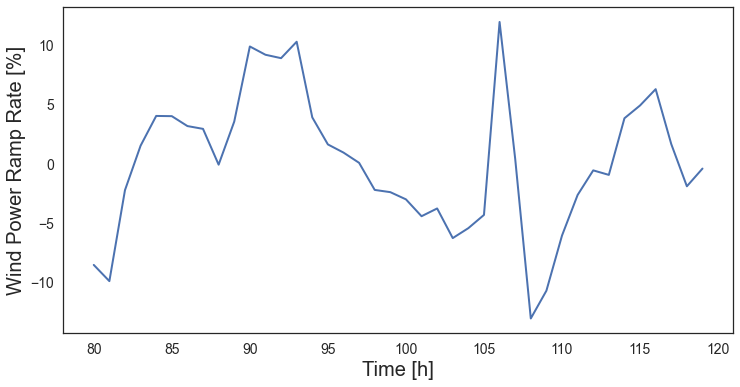

In [15]:
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(12, 6))

plt.tick_params(axis='x', labelsize=14)

ax.set_xlabel('Time [h]', fontsize=20)
ax.set_ylabel('Wind Power Ramp Rate [%]', fontsize=20)
ax.plot(wind_df['Ramp Rate'][80:120], linewidth=2)
ax.tick_params(axis='y', labelsize=14)
fig.savefig('Origianl Ramp.png', dpi=1000, bbox_inches="tight")

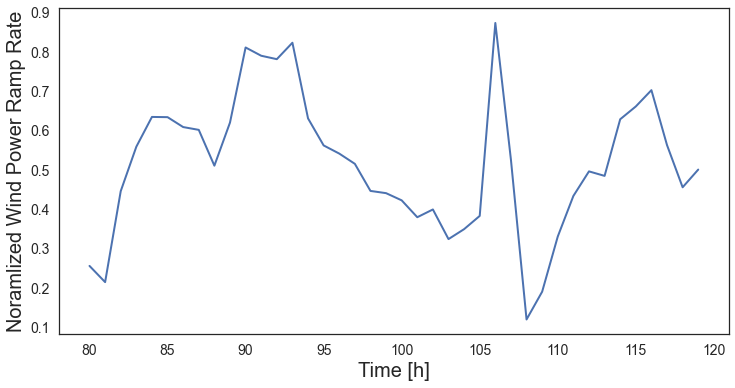

In [16]:
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(12, 6))

plt.tick_params(axis='x', labelsize=14)

ax.set_xlabel('Time [h]', fontsize=20)
ax.set_ylabel('Noramlized Wind Power Ramp Rate', fontsize=20)
ax.plot(wind_df['Normalized Ramp Rate'][80:120], linewidth=2)
ax.tick_params(axis='y', labelsize=14)
fig.savefig('Normalized Ramp.png', dpi=1000, bbox_inches="tight")

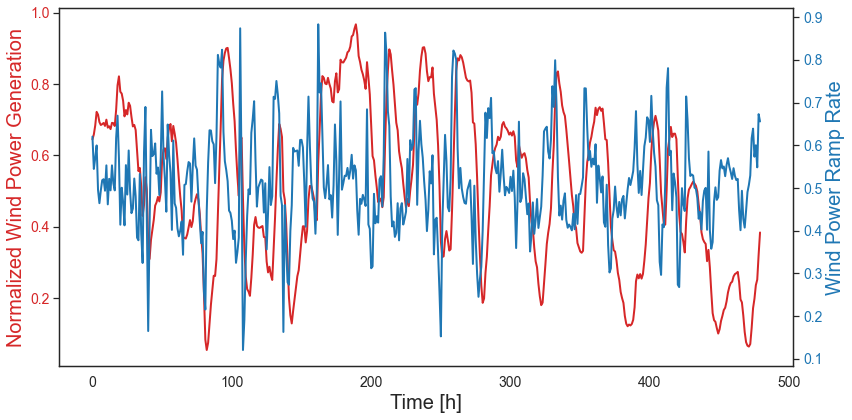

In [12]:
sns.set_theme(style="white")

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.tick_params(axis='x', labelsize=14)

color = 'tab:red'
ac
ax1.plot(wind_df['Total Wind Output'][:480], linewidth=2, label='Wind Power Generation', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('Time [h]', fontsize=20)
ax2.set_ylabel('Wind Power Ramp Rate', color=color, fontsize=20)
ax2.plot(wind_df['Normalized Ramp Rate'][:480], linewidth=2, label='Wind Power Ramp Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig('Gen_vs_Ramp_signal.png', dpi=1000, bbox_inches="tight")